In [19]:
# Import required libraries
import pandas as pd

# Read the CSV file
df = pd.read_csv('3D_Print_Jobs_cleaned.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
display(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
display(df.info())

df.dropna(inplace=True)

#TEST

Dataset Preview:


,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,Printed On,Material 2 Qty,Material 2,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,Bambu Labs,0.0,Bambu Labs ASA,0.05,Bambu Labs,21.04,User,14,8171785086,"Jan 6, 2025 12:12 PM"
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,"Jan 10, 2025 1:36 PM"
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,4.85,User,3,8214392486,"Jan 10, 2025 1:38 PM"
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,13.73,User,9,8238119583,"Jan 14, 2025 10:53 AM"
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,1.83,User,1,8269757333,"Jan 17, 2025 2:40 PM"



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  1930 non-null   object 
 1   Select Printer        1930 non-null   object 
 2   Slicer Project File   1929 non-null   object 
 3   Printer Requested     1930 non-null   object 
 4   User Email            1930 non-null   object 
 5   Printer Note          1929 non-null   object 
 6   Material 1 Qty        1930 non-null   float64
 7   User Type             1930 non-null   object 
 8   Material 1            1928 non-null   object 
 9   Material 1 Cost/Unit  1928 non-null   float64
 10  Printed On            1928 non-null   object 
 11  Material 2 Qty        1930 non-null   float64
 12  Material 2            1701 non-null   object 
 13  Material 2 Cost/Unit  1701 non-null   float64
 14  Printed On.1          1701 non-null   object 
 15  Print 

None

In [20]:
import numpy as np
df.pivot_table(
    index='User Type',
    values='Print Time (Hours)',
    aggfunc=[np.average,np.std,np.median,np.max,np.min]
)

/var/folders/f5/559_qhw57plby79lklrfrvm80000gn/T/ipykernel_55151/2174350208.py:2: FutureWarning: The provided callable <function std at 0x105dbe0c0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.pivot_table(
/var/folders/f5/559_qhw57plby79lklrfrvm80000gn/T/ipykernel_55151/2174350208.py:2: FutureWarning: The provided callable <function median at 0x105f1a520> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.pivot_table(
/var/folders/f5/559_qhw57plby79lklrfrvm80000gn/T/ipykernel_55151/2174350208.py:2: FutureWarning: The provided callable <function max at 0x105dbd580> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max

,average,std,median,max,min
,Print Time (Hours),Print Time (Hours),Print Time (Hours),Print Time (Hours),Print Time (Hours)
User Type,,,,,
Faculty / Staff,4.433333,4.531372,3.0,24,1
Graduate,4.181452,5.612607,2.0,48,1
Undergraduate,3.720511,5.714119,2.0,60,1


In [21]:
import numpy as np
df1 = df[['Print Time (Hours)', 'User Type']]

In [22]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
# Group the data by 'User Type'
grouped = df1.groupby('User Type')

# Function to find outliers using IQR
def find_outliers(group):
    Q1 = group['Print Time (Hours)'].quantile(0.25)
    Q3 = group['Print Time (Hours)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group['Print Time (Hours)'] < lower_bound) | (group['Print Time (Hours)'] > upper_bound)]
    return outliers

# Apply the function to each group
outliers = grouped.apply(find_outliers)

# Display the outliers
print("Outliers in 'Print Time (Hours)' by User Type:")
print(outliers)

Outliers in 'Print Time (Hours)' by User Type:
                      Print Time (Hours)        User Type
User Type                                                
Faculty / Staff 106                   24  Faculty / Staff
                298                   24  Faculty / Staff
                315                   16  Faculty / Staff
                413                   24  Faculty / Staff
                414                   16  Faculty / Staff
...                                  ...              ...
Undergraduate   1855                  15    Undergraduate
                1884                  47    Undergraduate
                1898                  10    Undergraduate
                1899                  48    Undergraduate
                1901                  17    Undergraduate

[134 rows x 2 columns]


/var/folders/f5/559_qhw57plby79lklrfrvm80000gn/T/ipykernel_55151/794052655.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = grouped.apply(find_outliers)


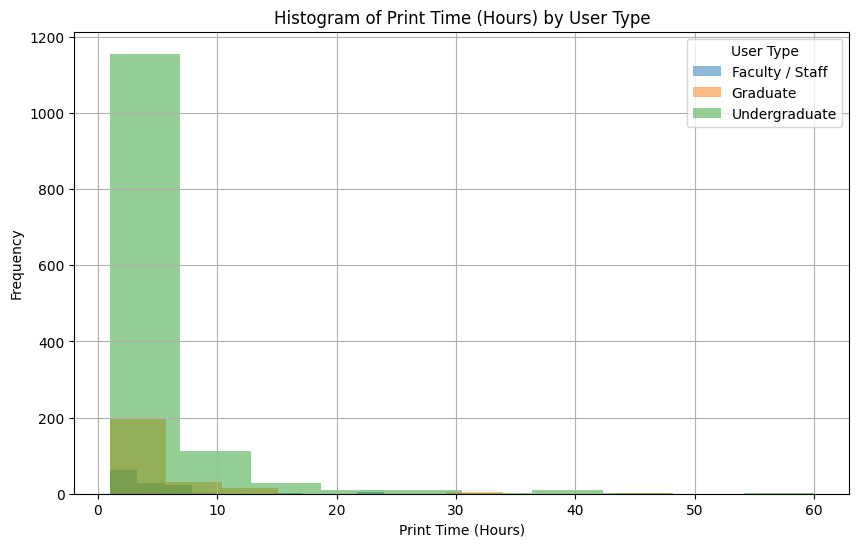

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Group the data by 'User Type'
grouped = df1.groupby('User Type')

# Plot a histogram for each user type
plt.figure(figsize=(10, 6))

for user_type, group in grouped:
    plt.hist(group['Print Time (Hours)'], bins=10, alpha=0.5, label=user_type)

plt.title('Histogram of Print Time (Hours) by User Type')
plt.xlabel('Print Time (Hours)')
plt.ylabel('Frequency')
plt.legend(title='User Type')
plt.grid(True)
plt.show()

In [24]:
df.pivot_table(
    index='User Type',
    columns='Material 1',
    values='Print Time (Hours)',
    aggfunc=[np.average]
)

average                                                 \
Material 1      Bambu Labs ABS Bambu Labs ABS-GF Bambu Labs ASA Bambu Labs PC   
User Type                                                                       
Faculty / Staff       1.800000               NaN            NaN           2.0   
Graduate              6.285714          3.285714            NaN           6.0   
Undergraduate         3.000000          3.666667            6.0           4.0   

                                                          \
Material 1      Bambu Labs PETG Basic Bambu Labs PETG HF   
User Type                                                  
Faculty / Staff              4.000000                NaN   
Graduate                     8.714286               18.0   
Undergraduate                2.066667                4.5   

                                                                  \
Material 1      Bambu Labs PETG Translucent Bambu Labs PLA Basic   
User Type                                                          
Faculty / Staff                         NaN             2.500000   
Graduate                                NaN             2.000000   
Undergraduate                      5.333333             2.567568   

                                                                              \
Material 1      Bambu Labs PLA Matte Bambu Labs PLA-CF Bambu Labs TPU 95A HF   
User Type                                                                      
Faculty / Staff             4.314286          6.000000                   NaN   
Graduate                    3.465608          2.750000              4.000000   
Undergraduate               3.290667          2.428571              3.060606   

                                                                    \
Material 1      Markforged Onyx Stratasys ABS M30 Stratasys PC-ABS   
User Type                                                            
Faculty / Staff             NaN               NaN              NaN   
Graduate                    NaN               NaN              NaN   
Undergraduate          6.333333         28.666667          30.1875   

                                     
Material 1      Ultimaker Tough PLA  
User Type                            
Faculty / Staff           12.750000  
Graduate                  12.800000  
Undergraduate              7.863636

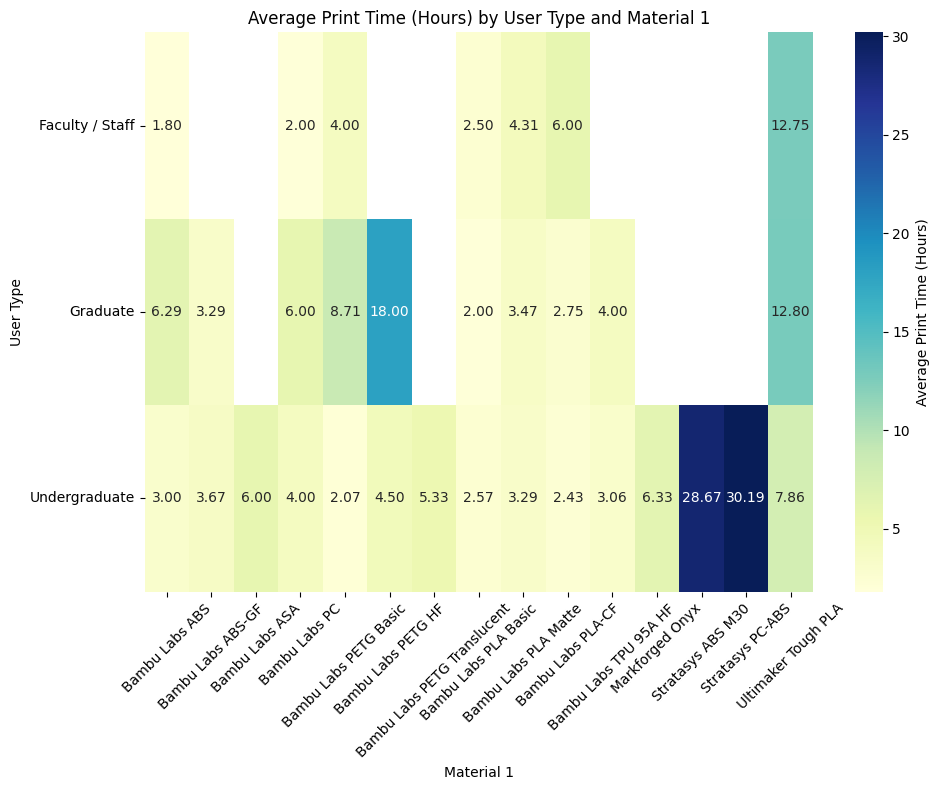

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and the pivot table is already created
pivot_df = df.pivot_table(
    index='User Type',
    columns='Material 1',
    values='Print Time (Hours)',
    aggfunc=np.average
)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Print Time (Hours)'})
plt.title('Average Print Time (Hours) by User Type and Material 1')
plt.xlabel('Material 1')
plt.ylabel('User Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
df.head(10)

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,Printed On,Material 2 Qty,Material 2,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,Bambu Labs,0.0,Bambu Labs ASA,0.05,Bambu Labs,21.04,User,14,8171785086,"Jan 6, 2025 12:12 PM"
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,"Jan 10, 2025 1:36 PM"
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,4.85,User,3,8214392486,"Jan 10, 2025 1:38 PM"
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,13.73,User,9,8238119583,"Jan 14, 2025 10:53 AM"
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,1.83,User,1,8269757333,"Jan 17, 2025 2:40 PM"
5,LilahProjectTest1,Tai Lung,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lkirkham@wisc.edu,X1C - Gray PLA/Red PLA,58.12,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,2.91,User,2,8321390406,"Jan 24, 2025 1:43 PM"
6,Gel_fixtures,Monkey,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lsullivankon@wisc.edu,X1C - Black PLA/Blue PLA,129.10,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,6.46,User,3,8331849542,"Jan 27, 2025 9:38 AM"
7,Bensch 2025-01-27 Plate 1,Mr. Ping,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bensch@wisc.edu,X1C - Green PLA/White PLA,67.79,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,3.39,User,2,8332075134,"Jan 27, 2025 9:56 AM"
8,Bensch 2025-27-01 Plate 2,Mr. Ping,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bensch@wisc.edu,X1C - Green PLA/White PLA,67.79,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,3.39,User,2,8332118284,"Jan 27, 2025 10:00 AM"
9,Krishiv Dhupar,Mantis,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,dhupar@wisc.edu,X1C - White PLA/Dual PLA,59.00,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,2.95,Makerspace Staff,2,8332840625,"Jan 27, 2025 10:54 AM"


In [39]:
df.head(10)

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,...,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log,Material_Category,Material_Category2,Material_Category1
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,...,0.05,Bambu Labs,21.04,User,14,8171785086,"Jan 6, 2025 12:12 PM",ABS,ABS,ABS
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,"Jan 10, 2025 1:36 PM",PLA,PLA,PLA
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,4.85,User,3,8214392486,"Jan 10, 2025 1:38 PM",PLA,PLA,PLA
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,13.73,User,9,8238119583,"Jan 14, 2025 10:53 AM",PLA,PLA,PLA
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,1.83,User,1,8269757333,"Jan 17, 2025 2:40 PM",PLA,PLA,PLA
5,LilahProjectTest1,Tai Lung,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lkirkham@wisc.edu,X1C - Gray PLA/Red PLA,58.12,Undergraduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,2.91,User,2,8321390406,"Jan 24, 2025 1:43 PM",PLA,PLA,PLA
6,Gel_fixtures,Monkey,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lsullivankon@wisc.edu,X1C - Black PLA/Blue PLA,129.10,Undergraduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,6.46,User,3,8331849542,"Jan 27, 2025 9:38 AM",PLA,PLA,PLA
7,Bensch 2025-01-27 Plate 1,Mr. Ping,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bensch@wisc.edu,X1C - Green PLA/White PLA,67.79,Undergraduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,3.39,User,2,8332075134,"Jan 27, 2025 9:56 AM",PLA,PLA,PLA
8,Bensch 2025-27-01 Plate 2,Mr. Ping,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bensch@wisc.edu,X1C - Green PLA/White PLA,67.79,Undergraduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,3.39,User,2,8332118284,"Jan 27, 2025 10:00 AM",PLA,PLA,PLA
9,Krishiv Dhupar,Mantis,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,dhupar@wisc.edu,X1C - White PLA/Dual PLA,59.00,Undergraduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,2.95,Makerspace Staff,2,8332840625,"Jan 27, 2025 10:54 AM",PLA,PLA,PLA


In [37]:
import pandas as pd
import numpy as np

# Define material categories
material_categories = {
    'PLA': ['PLA Basic', 'PLA Matte', 'PLA-CF', 'Tough PLA'],
    'Resin': ['Tough 1500', 'White', 'Clear'],
    'Nylon': ['Nylon 12', 'Onyx'],
    'ABS': ['ABS', 'ABS-GF', 'ABS M30'],
    'PC': ['PC', 'PC-ABS'],
    'PETG': ['PETG Basic', 'PETG HF', 'PETG Translucent']
}
def get_material_category(material_name):
    for category, keywords in material_categories.items():
        if any(keyword.lower() in material_name.lower() for keyword in keywords):
            return category
    return 'Other'  # For any materials that don't match the categories

# Add new column with material categories
df['Material_Category1'] = df.apply(lambda row: get_material_category(row['Material 1']), axis=1)
df['Material_Category2'] = df.apply(lambda row: get_material_category(row['Material 2']), axis=1)

# Now you can create a scatter plot using the categorized data
plt.figure(figsize=(15, 8))
for category in df['Material_Category'].unique():
    mask = df['Material_Category'] == category
    plt.scatter(df[mask].index, df[mask]['Value'], 
               label=category, 
               alpha=0.7,
               s=100)

plt.title('Material Categories by User Type', fontsize=14, pad=20)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


KeyError: 'Value'

<Figure size 1500x800 with 0 Axes>

In [27]:
df2 = categorize_materials(df)


In [33]:
df2.shape

(1699, 6)